<a href="https://colab.research.google.com/github/Ga2236/Analise-de-dados-airbnb-Rio-de-janeiro/blob/main/analise_de_dados_AIR_BNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto - Análise de Dados - AirBnB - Rio de Janeiro**


algumas das principais cidades do mundo. Por meio do portal Inside Airbnb é possível acessá-los. No nosso caso,
analisaremos os dados de locações da cidade Rio de Janeiro,RJ, Brasil .

In [51]:
# 1 - Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "svg"
plt.rcParams["font.family"] = "sans-serif"

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# 2 - Acessando a base de dados
df = pd.read_csv("/content/drive/MyDrive/dados_airbnb_riodejaneiro/listings.csv")
print(pd.read_csv)

<function read_csv at 0x7e4c0dbf4ea0>


In [54]:
# 3 - Verificando a quantidade de linhas e colunas
df.shape

(42013, 79)

In [55]:
# 4 - Verificando os nomes das colunas
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [56]:
# 5 - Verificando os tipos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42013 entries, 0 to 42012
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            42013 non-null  int64  
 1   listing_url                                   42013 non-null  object 
 2   scrape_id                                     42013 non-null  int64  
 3   last_scraped                                  42013 non-null  object 
 4   source                                        42013 non-null  object 
 5   name                                          42013 non-null  object 
 6   description                                   40982 non-null  object 
 7   neighborhood_overview                         16819 non-null  object 
 8   picture_url                                   42013 non-null  object 
 9   host_id                                       42013 non-null 

Significado de cada coluna:



*   id - número de id gerado cuja finalidade é identificar o imóvel;
*   name - nome da propriedade anunciada;
*   host_id - número de id do proprietário (anfitrião) da propriedade;
*   host_name - nome do anfitrião;
*   neighbourhood_group - esta coluna não possui valor válido;
*   neighbourhood - nome do bairro;
*   latitude - coordenada da latitude do imóvel;
*   longitude - coordenada da longitude do imóvel;
*   room_type - informação sobre o tipo de quarto que é ofertado;
*   price - preço para alugar o imóvel;
*   minimum_nights - período mínimo de noites por reserva;
*   number_of_reviews - número de reviews que o imóvel possui;
*   last_review - data do último review;
*   reviews_per_month - quantidade de reviews por mês;
*   calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião;
*   availability_365 - número de dias disponíveis em 365 dias.

In [57]:
# 6 - Visualizando as primeiras linhas da base de dados
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2302715,https://www.airbnb.com/rooms/2302715,20250319150537,2025-03-20,city scrape,guilherme,"House with five large bedrooms, living room, g...",NaN,https://a0.muscache.com/pictures/30842883/b19c...,11706874,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,2304688,https://www.airbnb.com/rooms/2304688,20250319150537,2025-03-20,city scrape,OLIMPÍADAS 2016,"Apartment with living room, 2 bedrooms and kit...","Beaches, restaurants, supermarkets, amusement ...",https://a0.muscache.com/pictures/30867360/fe14...,10405816,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,2306547,https://www.airbnb.com/rooms/2306547,20250319150537,2025-03-20,city scrape,Amplo Apto com 3 Dormitórios em Copacabana - 1...,Excellent apartment in Copacabana. Cozy and la...,The Copacabana Neighborhood is independent an...,https://a0.muscache.com/pictures/4923e99d-7190...,4107346,...,4.92,5.00,4.77,NaN,f,1,1,0,0,0.21
3,2306767,https://www.airbnb.com/rooms/2306767,20250319150537,2025-03-20,city scrape,Studio in Copacabana Beach,WITH NOISE-RESISTANT WINDOWS<br />Bright and c...,"Copacabana is a middle class neighborhood, saf...",https://a0.muscache.com/pictures/e430b243-bcbd...,11386725,...,4.88,4.84,4.65,NaN,f,6,6,0,0,1.44
4,2308385,https://www.airbnb.com/rooms/2308385,20250319150537,2025-03-20,city scrape,Copacabana Ótima opção!,"Separate studio in living room/bedroom, bathro...","Great location, we are between post 3 and 4 of...",https://a0.muscache.com/pictures/8c850dd6-bc0d...,11788583,...,5.00,4.79,4.75,NaN,f,1,1,0,0,0.21


Identificando valores NaN (nulos ou ausentes):

A verificação de valores nulos é imprescindível para compreensão de sua existência, assim como sua correção, para evitar os possíveis erros na análise.

In [58]:

# 7 - Verificando a existência de valores NaN (nulos / ausentes)
df.isnull().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


Excluindo os valores NaN:

Utilizaremos o método dropna para a exclusão das linhas com valores ausentes pela coluna price.

In [59]:
# 9 - Excluindo as linhas com valores nan pela coluna price (onde não há preços), com o método dropna
df.dropna(subset = ["price"], inplace = True)

Verificando o resumo estatístico:

Uma vez que realizamos as exclusões necessárias, verificaremos o resumo estatístico para nossa primeira compreensão sobre seus valores. Utilizaremos o método describe para isso.

In [60]:
# 10 - Verificando o resumo estatístico das colunas com valores numéricos
df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month",
    "calculated_host_listings_count", "availability_365"]].describe().round()


,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38356.0,38356.0,30356.0,38356.0,38356.0
mean,3.0,24.0,1.0,9.0,200.0
std,14.0,47.0,1.0,25.0,123.0
min,1.0,0.0,0.0,1.0,0.0
25%,1.0,1.0,0.0,1.0,85.0
50%,2.0,6.0,1.0,2.0,179.0
75%,3.0,27.0,2.0,5.0,336.0
max,1000.0,726.0,14.0,214.0,365.0


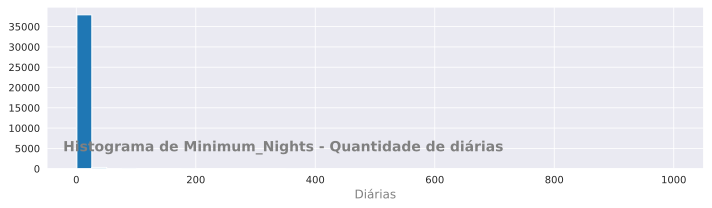

In [61]:
# 11 - Plotando histograma da coluna "minimum_nights"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
ax.hist("minimum_nights", data = df, bins = 40)
ax.text(-22, 4300, "Histograma de Minimum_Nights - Quantidade de diárias",
             color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_ylabel("")
ax.set_xlabel("Diárias", color = "grey", fontsize = 12)
plt.tight_layout()

O gráfico de histograma acima nos mostra uma grande concentração da quantidades de locações muito abaixo de 100 diárias. Ou seja, visualmente mais perto das 30 diárias, confirmando os dados do nosso resumo estatístico. Outra possibilidade de visualização sobre a distribuição dos dados é o gráfico boxplot.

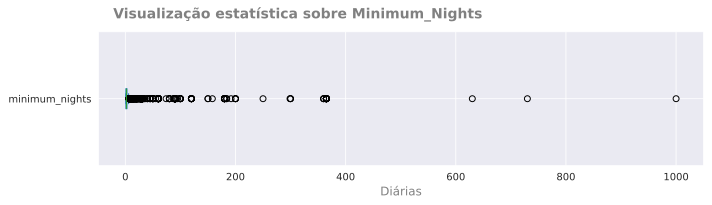

In [62]:
# 12 - Plotando o boxplot da coluna "minimum_nights"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
df.minimum_nights.plot(kind = "box", vert = False, ax = ax)
ax.text(-22, 1.6, "Visualização estatística sobre Minimum_Nights", color = "grey", fontsize = 14, fontweight = "bold")
ax.set_ylabel("")
ax.set_xlabel("Diárias", color = "grey", fontsize = 12)
plt.tight_layout()

In [63]:
# 13 - Quantidade de locações por período de locação até 30 dias:
print(f"Quantidade total de locações até 30 dias pela coluna minimum_nights: {(len(df[df.minimum_nights <= 30]))}.")
print("Percentual de correspondência da base de dados: {:.2f}%.".format((len(df[df.minimum_nights <= 30]) / df.shape[0])*100))


Quantidade total de locações até 30 dias pela coluna minimum_nights: 38169.
Percentual de correspondência da base de dados: 99.51%.


Com o gráfico boxplot acima podemos ratificar que a quantidade mínima de noites pela coluna minimum_nights está concentrada nos primeiros valores. Portanto, existe uma boa quantidade de outliers, que são valores discrepantes do padrão. De forma mais detalhada, em conjunto com o resumo estatístico, verificamos ainda que as locações até 30 noites são responsáveis por cerca de 99% das ocorrências.

Para melhorarmos nossa análise exploratória, uma boa prática é gerarmos uma cópia da base de dados para nossos tratamentos necessários.

In [64]:
# 14 - Gerando uma cópia da base de dados
df_copia = df.copy()

Aprofundaremos nossos tratamentos excluindo os valores outliers da coluna minimum_nights, ou seja, valores superiores a 30 diárias. Vamos ainda visualizar a distribuição desta nova base de dados.

In [65]:
# 15 - Removendo os valores "outliers" da coluna minimum_nights
df_copia.drop(df_copia[df_copia.minimum_nights > 30].index, axis = 0, inplace = True)

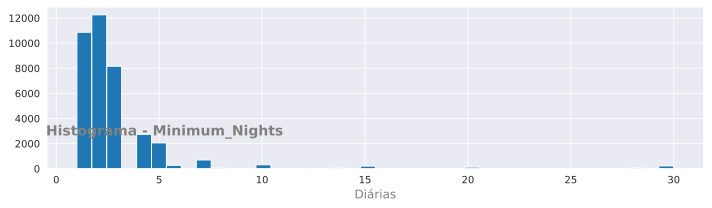

In [66]:
# 17 - Plotando um histograma da coluna "minimum_nights" sem "outliers"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
sns.set_style()
ax.hist("minimum_nights", data = df_copia, bins = 40)
ax.text(-0.5, 2650, "Histograma - Minimum_Nights", color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_ylabel("")
ax.set_xlabel("Diárias", color = "grey", fontsize = 12)
plt.tight_layout()

Percebemos nitidamente que temos 2 grupos de locatários. Um deles é o que normalmente realiza locações até perto de 10 dias, sendo mais específico, 7 dias, já o outro grupo loca por cerca de 30 dias. Vamos realizar uma nova separação na base de dados entre os dois grupos. As bases serão df_7 e df_30.